# Death Causing Pollutant Levels

In [1]:
import pandas as pd
import matplotlib.pyplot as mp
%matplotlib inline

In [2]:
df = pd.read_csv("Data Sets/Pre Corona Pandemic Datasets/Pollutant Data.csv")
df.head()

,Unnamed: 0,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,543,Ahmedabad,2016-06-27,33.02,NaN,11.69,28.91,40.60,NaN,11.69,1.38,36.04,0.0,0.0,0.0,NaN,NaN
1,544,Ahmedabad,2016-06-28,27.29,NaN,9.81,28.12,37.93,NaN,9.81,1.61,39.26,0.0,0.0,0.0,272.0,Poor
2,545,Ahmedabad,2016-06-29,41.43,NaN,10.45,31.82,42.09,NaN,10.45,1.70,28.05,0.0,0.0,0.0,253.0,Poor
3,546,Ahmedabad,2016-06-30,30.16,NaN,10.41,15.99,26.40,NaN,10.41,1.60,23.76,0.0,0.0,0.0,256.0,Poor
4,547,Ahmedabad,2016-07-01,29.42,NaN,9.39,10.11,19.50,NaN,9.39,1.57,16.42,0.0,0.0,0.0,257.0,Poor


# Data Preprocessing.

In [3]:
df = df.drop(['Unnamed: 0','NO','NO2','NOx','NH3','CO','SO2','AQI','Benzene','Toluene','Xylene','AQI_Bucket','City'],axis=1)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.sort_values(by=['Date'],axis=0,inplace=True)
df

,Date,PM2.5,PM10,O3
3214,2016-01-01,56.40,95.08,55.96
7580,2016-01-01,295.71,476.09,108.14
9263,2016-01-01,NaN,NaN,27.40
11236,2016-01-01,232.83,108.20,27.64
6015,2016-01-01,65.97,NaN,34.57
...,...,...,...,...
3213,2020-05-01,31.83,130.47,43.57
2079,2020-05-01,39.00,55.00,28.60
1243,2020-05-01,NaN,NaN,NaN
20173,2020-05-01,29.26,76.89,35.56


In [6]:
df['Year'] = df['Date'].dt.to_period('M')
df = df.drop(['Date'],axis=1)

# Group the values using groupby().

In [7]:
df = df.groupby(['Year']).sum()
df

,PM2.5,PM10,O3
Year,,,
2016-01,30102.43,19543.79,8602.95
2016-02,21647.48,14400.99,8415.95
2016-03,20168.96,12729.13,9458.45
2016-04,16218.71,14013.55,9760.17
2016-05,13745.83,10050.64,9139.76
2016-06,11700.42,6479.73,6214.38
2016-07,10120.90,4562.02,5107.65
2016-08,8527.59,4639.97,4623.59
2016-09,9920.10,9062.46,6527.32


# Perform visualization to see the insights.

<Figure size 1584x576 with 0 Axes>

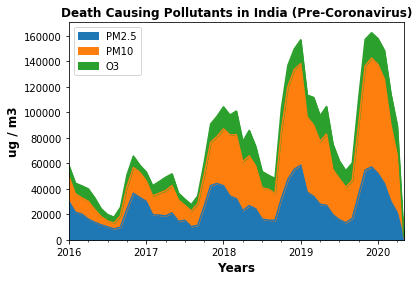

In [11]:
width = 22
height = 8
mp.figure(figsize = (width,height))
df.plot(kind='area')
mp.xlabel('Years',fontsize='large', fontweight='bold')
mp.ylabel('ug / m3',fontsize='large', fontweight='bold')
mp.title('Death Causing Pollutants in India (Pre-Coronavirus)', fontsize='large', fontweight='bold')
mp.show()